### A.)

- function find_max_average_subtree(root):
    - if root is Null:
        - return Null
    - max_average <- 0
    - root_max <- Null

    - for child in root.child:
        - max_child <- calculate_max_average_subtree(child)
        - if max_child > max_average:
            - max_avergae <- max_child
            - root_max <- child

        
    - return root_max


- function calculate_max_average_subtree(root):
    - if root is Null:
        - return 0
    - sum <- root.value
    - node <- 1

    - for child in root.child:
        - sum <- sum + calculate_max_average_subtree(child)
        - node <- node + 1
        
    - return sum / node

### B.)

#### **UNIONE**:
Siccome due alberi binari A e B, posso enumerare in-ordine metendo ogni elemento in un array <br />
(arr_1 per A e arr_2 per B) per poi combinarli in un array piú grande arr <br />
contenendo gli elementi di arr_1 e arr_2. <br />
Infine costruire arr in un albero binario bilanciato. <br />

- Costruzione di un array arr_1 da albero A -> *O*(n) dalla lettura di A
- Costruzione di un array arr_2 da albero B -> *O*(m) dalla lettura di B
- Costruzione di un array arr da arr_1 unito arr_2 -> *O*(n+m) dal unione
- Costruzione di un Albero binario bilanciato da arr *O*(n+m)
- ->*O*(n+m)
- -> Nuovo albero contente gli elementi di A e B

#### **DIFFERENZA**:
Siccome due alberi binari A e B ( len(A) > len(B) ), <br />
posso enumerare in-ordine metendo ogni elemento in un array (arr per A e arr_2 per B) <br />
per poi rimuovere gli elementi di arr_2 da arr. <br />
Infine ricostruire arr in un albero binario bilanciato. <br />

- Costruzione di un array arr da albero A -> *O*(n) dalla lettura di A
- Costruzione di un array arr_2 da albero B -> *O*(m) dalla lettura di B
- Rimozione degli elementi di arr_2 da arr -> *O*(n+m) dalla leturra arr+arr_2
- Costruzione di un Albero binario bilanciato da arr *O*(n-m)
- ->*O*(n+m)
- -> Stesso albero A rimosso gli elementi di B

#### **INTERSEZIONE**:
Siccome due alberi binari A e B, posso enumerare in-ordine metendo ogni elemento in un array <br />
(arr_1 per A e arr_2 per B) per comparare gli elementi di arr_1 e arr_2 <br />
e mettere quelli uguali in un nuovo array arr. <br />
Infine costruire arr in un albero binario bilanciato . <br />

- Costruzione di un array arr_1 da albero A -> *O*(n) dalla lettura di A
- Costruzione di un array arr_2 da albero B -> *O*(m) dalla lettura di B
- Comparazione degli elementi di arr_1 da arr_2 e costruzione di arr
- -> *O*(n+m+k) dalla leturra arr+arr_2 + inserimento di elementi comuni
- Costruzione di un Albero binario bilanciato da arr O(k) 
- ->*O*(n+m+k)
- -> Nuovo albero contente solo gli elementi comuni fra A e B

### C.)

Dato un BRT, il max nodi sará dato dalla alternanza fra rosso e nero. <br />
Quindi avró altezza dato da k+1 con ogni radice avendo 2 figli <br />
- -> max(n) = 2^(k+1) - 1 <br />

Mentre per il min nodi, serve un altezza minima dato da soli neri. <br />
Quindi altezza k con ogni radice avendo 2 figli <br />
- -> min(n) = 2^k - 1 <br />

In [17]:
import matplotlib.pyplot as plt

# Dati per la tabella
data = [
    ["Distribution", "PDF/PMF", "CDF", "Expectation (Mean)", "Variance", "Correlation to Others"],
    ["Bernoulli", r"$p^k(1-p)^{1-k}$", "N/A", r"$p$", r"$p(1-p)$", "Binomial (n=1)"],
    ["Binomial", r"$\binom{n}{k}p^k(1-p)^{n-k}$", "N/A", r"$np$", r"$np(1-p)$", "Sum of Bernoullis"],
    ["Geometric", r"$p(1-p)^{k-1}$", r"$1-(1-p)^k$", r"$\frac{1}{p}$", r"$\frac{1-p}{p^2}$", "Negative Binomial (r=1)"],
    ["Hypergeometric", r"$\frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$", "Complicated", r"$\frac{nK}{N}$", r"$\frac{nK(N-K)(N-n)}{N^2(N-1)}$", "Differs from Binomial"],
    ["Negative Binomial", r"$\binom{k+r-1}{k}p^r(1-p)^k$", "Complicated", r"$\frac{r}{p}$", r"$\frac{r(1-p)}{p^2}$", "Sum of Geometrics"],
    ["Gamma", r"$\frac{x^{k-1}e^{-x/\theta}}{\Gamma(k)\theta^k}$", "Complicated", r"$k\theta$", r"$k\theta^2$", "Generalizes Exponential"],
    ["Poisson", r"$\frac{\lambda^ke^{-\lambda}}{k!}$", r"$\sum_{i=0}^{k}\frac{\lambda^ie^{-\lambda}}{i!}$", r"$\lambda$", r"$\lambda$", "Limit of Binomial (n large, p small)"],
    ["Exponential", r"$(\lambda)e^{-\lambda(x)}$", r"$1-e^{-\lambda(x)}$", r"$\frac{1}{\lambda}$", r"$\frac{1}{\lambda^2}$", "Gamma (k=1)"],
    ["Uniform (Discrete)", "Uniform", "N/A", r"$\frac{a+b}{2}$", r"$\frac{(b-a+1)^2-1}{12}$", "N/A"],
    ["Uniform (Continuous)", r"$\frac{1}{b-a}$", r"$\frac{x-a}{b-a}$", r"$\frac{a+b}{2}$", r"$\frac{(b-a)^2}{12}$", "N/A"],
    ["Normal", r"$\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$", "Complicated", r"$\mu$", r"$\sigma^2$", "Limit of many distributions"],
    ["Beta", r"$\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$", "Complicated", r"$\frac{\alpha}{\alpha+\beta}$", r"$\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$", "N/A"],
    ["Chi-squared", r"$\frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)}$", "Complicated", r"$k$", r"$2k$", "Special case of Gamma"],
    ["T-student", r"$\frac{\Gamma((\nu+1)/2)}{\sqrt{\nu\pi}\Gamma(\nu/2)}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}$", "Complicated", "0 (for $\nu>1$)", r"$\frac{\nu}{\nu-2}$ (for $\nu>2$)", "N/A"]
]

# Funzione per dividere il testo in più righe se necessario
def wrap_text(text, width=20):
    """Divide il testo in righe più corte."""
    words = text.split()
    wrapped_lines = []
    current_line = []
    current_length = 0
    for word in words:
        if current_length + len(word) > width:
            wrapped_lines.append(' '.join(current_line))
            current_line = [word]
            current_length = len(word)
        else:
            current_line.append(word)
            current_length += len(word) + 1  # +1 per lo spazio
    wrapped_lines.append(' '.join(current_line))  # Aggiungi l'ultima riga
    return '\n'.join(wrapped_lines)

# Applica wrap_text a ciascun elemento dei dati se necessario
for i in range(1, len(data)):
    for j in range(len(data[i])):
        data[i][j] = wrap_text(data[i][j], width=15)  # Regola 'width' come necessario

headers = data.pop(0)

fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=data, colLabels=headers, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3.3)  # Ajusta scala per adattarsi al testo

plt.show()


RuntimeError: latex was not able to process the following string:
b'$\\\\binom{n}{k}p^k(1-p)^{n-k}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../d5c883c2dcf50183dcfdc133bf9ed665.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(../d5c883c2dcf50183dcfdc133bf9ed665.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty)
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx
.sty) (C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\mutua\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file d5c883c2dcf50183dcfdc133bf9ed665.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \binom 
                       
l.29 {\rmfamily $\binom
                       {n}{k}p^k(1-p)^{n-k}$}%
No pages of output.
Transcript written on d5c883c2dcf50183dcfdc133bf9ed665.log.




<Figure size 1400x1000 with 1 Axes>

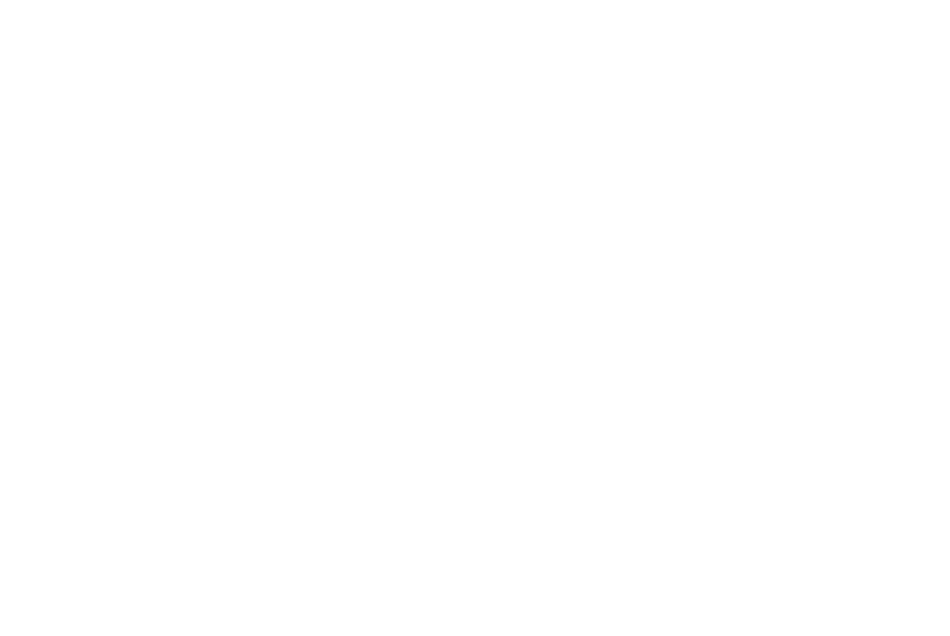

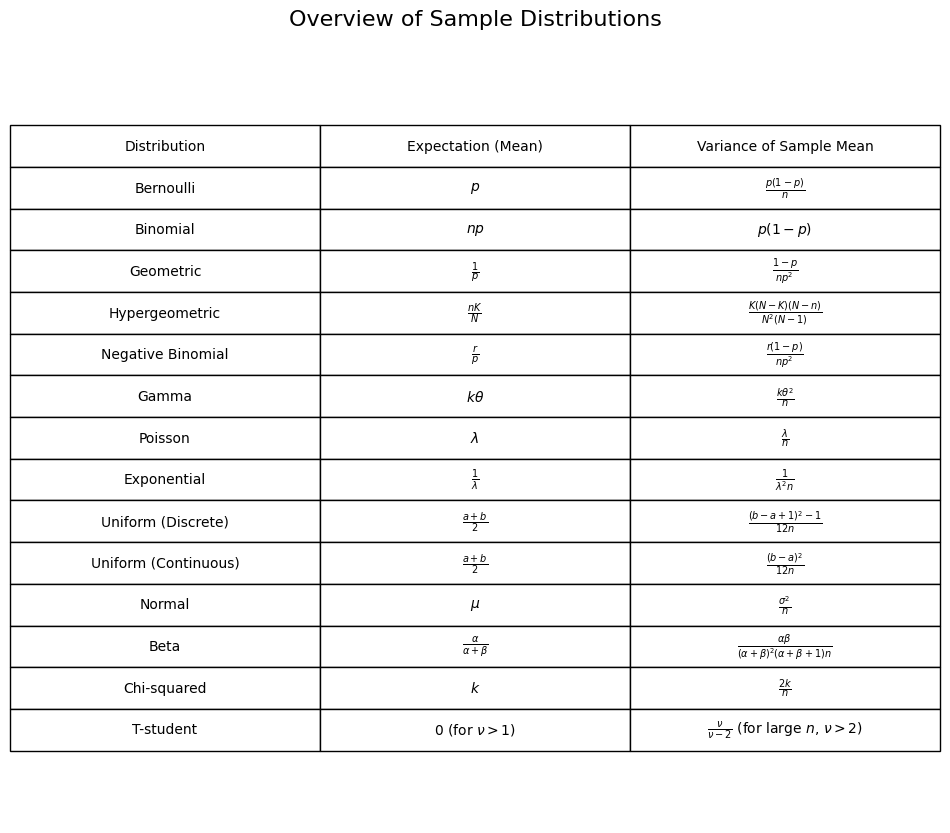

In [6]:
import matplotlib.pyplot as plt

# Preparazione dei dati per la tabella
headers = ["Distribution", "Expectation (Mean)", "Variance of Sample Mean"]
rows = [
    ["Bernoulli", r"$p$", r"$\frac{p(1-p)}{n}$"],
    ["Binomial", r"$np$", r"$p(1-p)$"],
    ["Geometric", r"$\frac{1}{p}$", r"$\frac{1-p}{np^2}$"],
    ["Hypergeometric", r"$\frac{nK}{N}$", r"$\frac{K(N-K)(N-n)}{N^2(N-1)}$"],
    ["Negative Binomial", r"$\frac{r}{p}$", r"$\frac{r(1-p)}{np^2}$"],
    ["Gamma", r"$k\theta$", r"$\frac{k\theta^2}{n}$"],
    ["Poisson", r"$\lambda$", r"$\frac{\lambda}{n}$"],
    ["Exponential", r"$\frac{1}{\lambda}$", r"$\frac{1}{\lambda^2n}$"],
    ["Uniform (Discrete)", r"$\frac{a+b}{2}$", r"$\frac{(b-a+1)^2-1}{12n}$"],
    ["Uniform (Continuous)", r"$\frac{a+b}{2}$", r"$\frac{(b-a)^2}{12n}$"],
    ["Normal", r"$\mu$", r"$\frac{\sigma^2}{n}$"],
    ["Beta", r"$\frac{\alpha}{\alpha+\beta}$", r"$\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)n}$"],
    ["Chi-squared", r"$k$", r"$\frac{2k}{n}$"],
    ["T-student", r"0 (for $\nu>1$)", r"$\frac{\nu}{\nu-2}$ (for large $n$, $\nu>2$)"]
]

# Creazione della figura
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
ax.axis('tight')

# Aumenta figsize per più spazio verticale, ad es. (larghezza, altezza)
fig, ax = plt.subplots(figsize=(12, 10))  # Aumento l'altezza qui
ax.axis('off')

# Creazione della tabella
table = ax.table(cellText=rows, colLabels=headers, cellLoc='center', loc='center')

# Ajusta la scala della tabella per più spazio
# Il primo valore è per la larghezza, il secondo per l'altezza delle celle
table.scale(1, 2.5)  # Aumenta il secondo valore per più spazio verticale

# Imposta manualmente la dimensione del font se necessario per adattarsi allo spazio extra
table.auto_set_font_size(False)
table.set_fontsize(10)


plt.title('Overview of Sample Distributions', fontsize=16, pad=20)

plt.show()
